<a href="https://colab.research.google.com/github/Fwilliamm/Projet_bienetre/blob/main/Projet_fin_de_module_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Exploration du Dataset**

In [ ]:
# Objectif : Comprendre la structure des données et détecter d’éventuels problèmes

# - Vérification des types de données
# - Détection de valeurs manquantes
# - Analyse des statistiques descriptives
# - Analyse des corrélations entre les variables

In [ ]:
import pandas as pd
# Chargement des données
df=pd.read_csv('/content/bienetre.csv')

In [ ]:
# Affichage des 5 premières lignes du dataset
print("Aperçu des données :")
print(df.head())

Aperçu des données :
   target        age      taille      poids       revenu  experience  \
0       1  76.378818  172.472900  93.637574  2317.284189   23.187146   
1       1  39.629339  162.527782  88.071856  2740.909189   26.742305   
2       0  36.506832  196.457696  85.160759  3541.036636   20.895824   
3       1  50.016190  174.829299  72.362368  3093.794975   26.155986   
4       1  60.743330  171.536491  54.874865  2113.805284   14.771488   

   education        imc    stress  nb_enfants  ...  exercice  alimentation  \
0   2.524067  24.544095  5.805570         1.0  ...       4.0      6.128322   
1   3.136856  26.805875  3.970287         1.0  ...       1.0      6.068320   
2   4.282662  24.218407  2.312967         0.0  ...       3.0      6.503321   
3   3.007974  23.452811  5.387465         0.0  ...       3.0      6.015851   
4   2.780533  26.065223  6.859302         1.0  ...       3.0      5.344601   

    sommeil    pression  cholesterol  activite  satisfaction     risque  \
0 

In [ ]:
# Informations sur le dataset (nombre de valeurs, types de données)
print("\nInformations générales sur le dataset :")
print(df.info())

# Statistiques descriptives (moyenne, écart-type, min, max)
print("\nStatistiques descriptives :")
print(df.describe())

# Vérification des valeurs manquantes
valeurs_manquantes = df.isnull().sum()
print("\nValeurs manquantes par colonne :")
print(valeurs_manquantes)


Informations générales sur le dataset :
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 21 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   target        10000 non-null  int64  
 1   age           10000 non-null  float64
 2   taille        10000 non-null  float64
 3   poids         10000 non-null  float64
 4   revenu        10000 non-null  float64
 5   experience    10000 non-null  float64
 6   education     10000 non-null  float64
 7   imc           10000 non-null  float64
 8   stress        10000 non-null  float64
 9   nb_enfants    10000 non-null  float64
 10  depenses      10000 non-null  float64
 11  exercice      10000 non-null  float64
 12  alimentation  10000 non-null  float64
 13  sommeil       10000 non-null  float64
 14  pression      10000 non-null  float64
 15  cholesterol   10000 non-null  float64
 16  activite      10000 non-null  float64
 17  satisfaction  10000 non-null 

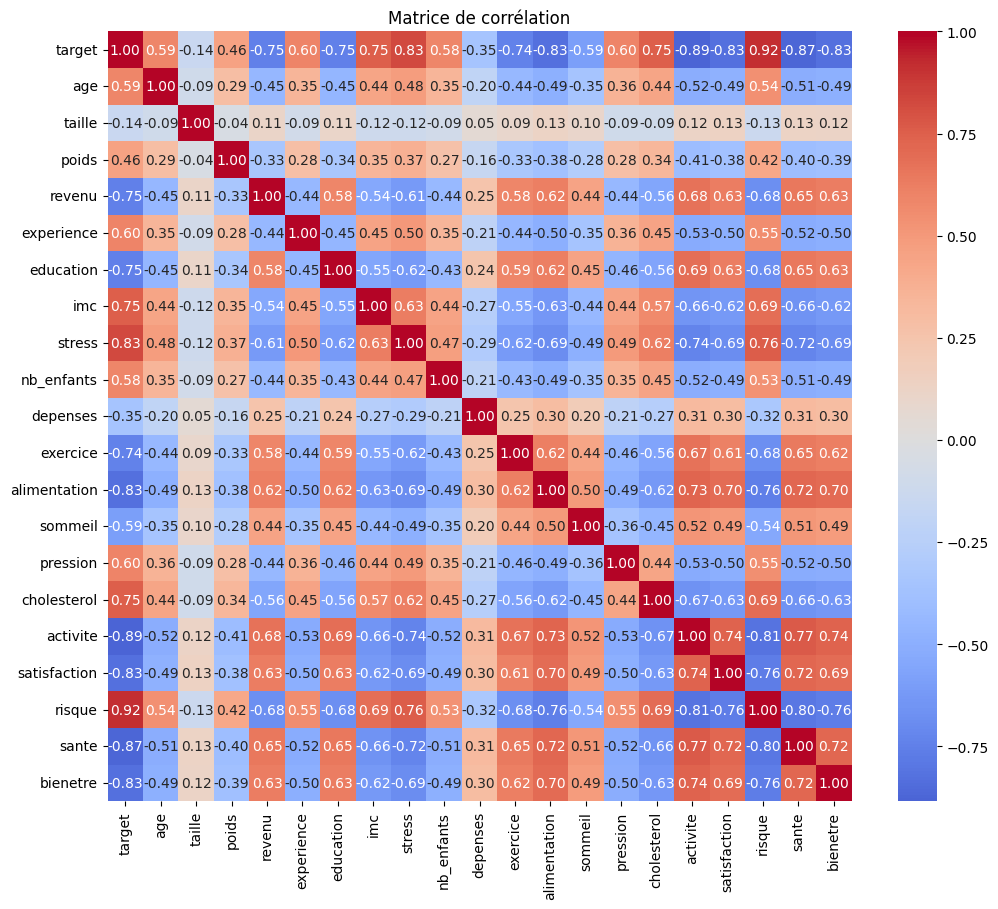

In [ ]:
# Visualisation des corrélations

import seaborn as sns
import matplotlib.pyplot as plt

matrice_corr = df.corr()

plt.figure(figsize=(12, 10))
sns.heatmap(matrice_corr, annot=True, cmap='coolwarm', center=0, fmt=".2f")
plt.title('Matrice de corrélation')
plt.show()

In [ ]:
# GESTION DES VALEURS MANQUANTES

# Objectif : Prévenir que les valeurs manquantes ne modifie l'analyse et l'entraînement des modèles.

# Remplacement des valeurs manquantes :
# - Pour les variables numériques → utilisation de la médiane pour le remplissage
# - Pour les variables catégorielles → utilisation de la valeur la plus fréquente (mode) pour le remplissage

In [ ]:
for column in df.columns:
    if df[column].dtype == 'object':  # Si la colonne est catégorielle
        df[column].fillna(df[column].mode()[0], inplace=True)  # Mode c'est la valeur la plus fréquente
    else:  # Si la colonne est numérique
        df[column].fillna(df[column].median(), inplace=True)  # Médiane c'est pour éviter l’impact des valeurs extrêmes

# Vérification après traitement
print("\nValeurs manquantes après traitement :")
print(df.isnull().sum().sum())  # Vérifie s'il reste des valeurs manquantes


Valeurs manquantes après traitement :
0


<ipython-input-157-909d4b8c7bbd>:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[column].fillna(df[column].median(), inplace=True)  # Médiane pour éviter l’influence des valeurs extrêmes


# **Normalisation de la Donnée**


Aperçu des données normalisées (train) :
        age    taille     poids    revenu  experience  education       imc  \
0 -0.843627  1.425210 -2.131435  0.692159    0.568622   0.628336 -0.564263   
1 -0.900566  1.304125 -1.827385  1.699136   -1.682819   1.074406 -0.443358   
2 -0.510487  0.326765  0.944989 -0.163327    0.241517   0.998533 -0.754469   
3  1.806842 -0.514730 -0.543378 -0.815025    2.006147  -1.475288  1.962822   
4 -1.375767 -0.524923 -0.850768  0.612026   -0.081301   1.463249 -1.449188   

     stress  nb_enfants  depenses  exercice  alimentation   sommeil  pression  \
0 -0.435622   -0.691175  0.362211  0.241665      1.875320 -0.123078 -0.650231   
1 -0.744580   -1.517198  2.494549  0.887613      1.382821  1.048712 -1.586812   
2 -1.119956   -0.691175  1.058261  0.241665      1.371959 -0.032936  0.691245   
3  1.348229    0.134848  1.043734 -0.404282     -1.274341 -0.555676  0.078805   
4 -1.407587   -0.691175  1.688422  0.887613      1.875643  0.232143  0.199407   

  

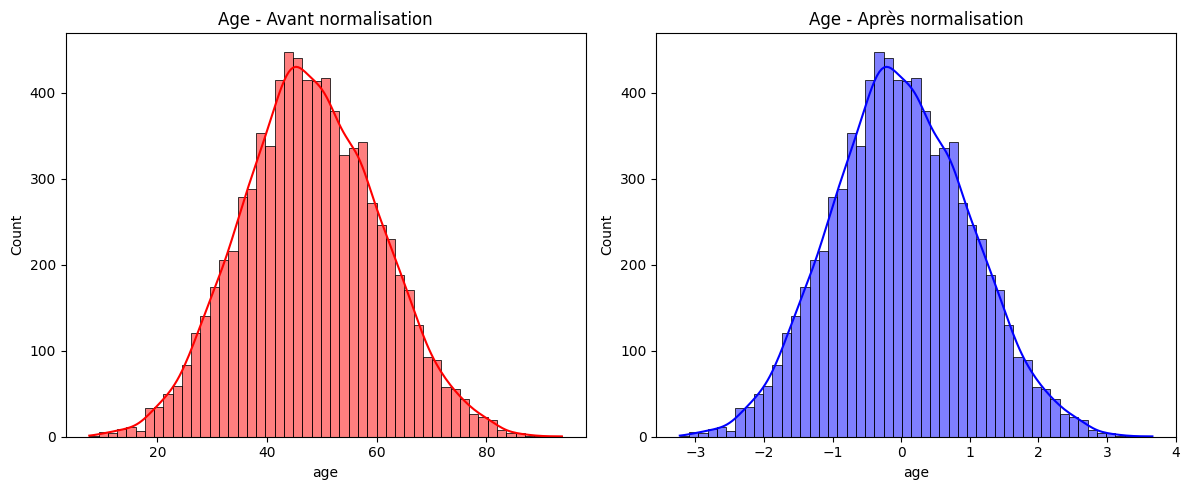

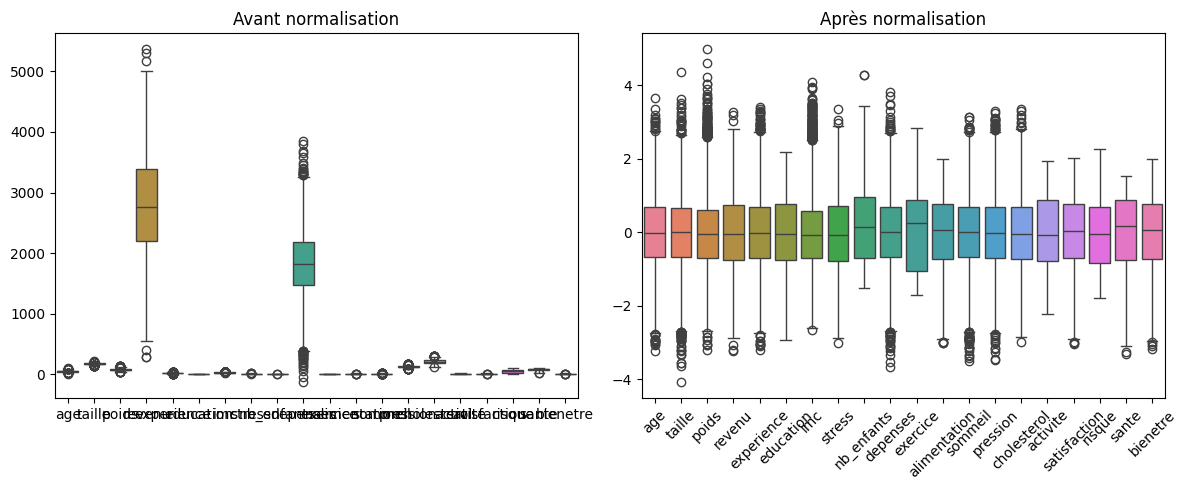

In [ ]:
# 3. NORMALISATION DES DONNÉES (Après séparation en train/test)

# Objectif : Mettre toutes les variables explicatives à la même échelle pour éviter les biais liés aux échelles différentes.

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Séparation des variables explicatives et de la cible
X = df.drop(columns=['target'])
y = df['target']

# Séparation en train/test AVANT normalisation
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Application de la normalisation
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)  # Utilisation de transform() afin d'éviter la fuite de données

# Conversion en DataFrame
df_scaled_train = pd.DataFrame(X_train_scaled, columns=X_train.columns)
df_scaled_test = pd.DataFrame(X_test_scaled, columns=X_test.columns)

# Vérification après normalisation
print("\nAperçu des données normalisées (train) :")
print(df_scaled_train.head())

# Visualisation des distributions avant et après normalisation
import matplotlib.pyplot as plt
import seaborn as sns

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 5))

# Avant normalisation
sns.histplot(X_train["age"], ax=axes[0], kde=True, color="red")
axes[0].set_title("Age - Avant normalisation")

# Après normalisation
sns.histplot(df_scaled_train["age"], ax=axes[1], kde=True, color="blue")
axes[1].set_title("Age - Après normalisation")

plt.tight_layout()
plt.show()

# Boxplots avant et après normalisation
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Avant normalisation
sns.boxplot(data=X_train, ax=axes[0])
axes[0].set_title("Avant normalisation")

# Après normalisation
sns.boxplot(data=df_scaled_train, ax=axes[1])
axes[1].set_title("Après normalisation")

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# **Réduction de Dimensionnalité avec la PCA**

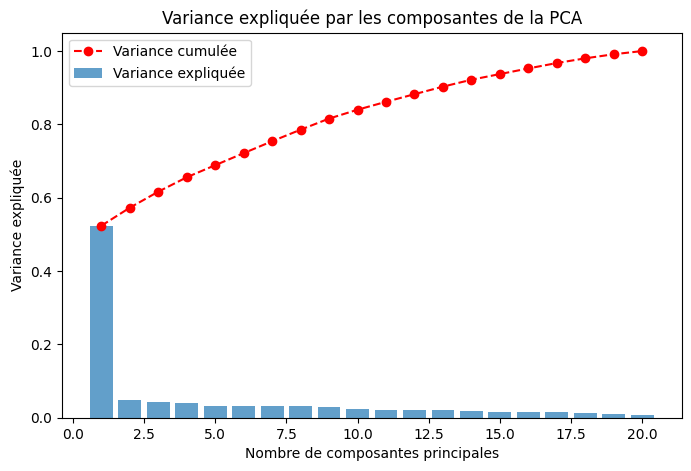

Nombre optimal de composantes pour capturer 95% de la variance : 16
Forme des données après PCA 95% : Train (8000, 16), Test (2000, 16)


In [ ]:
# Réduction de Dimensionnalité avec la PCA

from sklearn.decomposition import PCA
import numpy as np
import matplotlib.pyplot as plt

# Objectif : Réduire le nombre de dimensions tout en conservant un maximum d’information.

# Application de la PCA (avec toutes les composantes pour analyser la variance)
pca_full = PCA(n_components=X_train_scaled.shape[1])  # Nombre max de dimensions
pca_full.fit(X_train_scaled)

# Calcul de la variance expliquée
explained_variance = pca_full.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance)

# Affichage du Scree Plot (Variance expliquée par composante)
plt.figure(figsize=(8, 5))
plt.bar(range(1, len(explained_variance) + 1), explained_variance, alpha=0.7, label='Variance expliquée')
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o', linestyle='--', color='red', label='Variance cumulée')
plt.xlabel("Nombre de composantes principales")
plt.ylabel("Variance expliquée")
plt.title("Variance expliquée par les composantes de la PCA")
plt.legend()
plt.show()

# Détermination du nombre de composantes pour capturer 95% de la variance
n_components_95 = np.argmax(cumulative_variance >= 0.95) + 1
print(f"Nombre optimal de composantes pour capturer 95% de la variance : {n_components_95}")

# Appliquer la PCA avec ce nombre de composantes
pca_95 = PCA(n_components=n_components_95)
X_train_pca_95 = pca_95.fit_transform(X_train_scaled)
X_test_pca_95 = pca_95.transform(X_test_scaled)

# Vérification de la nouvelle forme des données après PCA
print(f"Forme des données après PCA 95% : Train {X_train_pca_95.shape}, Test {X_test_pca_95.shape}")

# Sélection de 2 et 3 composantes principales pour visualisation
pca_2d = PCA(n_components=2)
X_train_pca_2d = pca_2d.fit_transform(X_train_scaled)
X_test_pca_2d = pca_2d.transform(X_test_scaled)

pca_3d = PCA(n_components=3)
X_train_pca_3d = pca_3d.fit_transform(X_train_scaled)
X_test_pca_3d = pca_3d.transform(X_test_scaled)


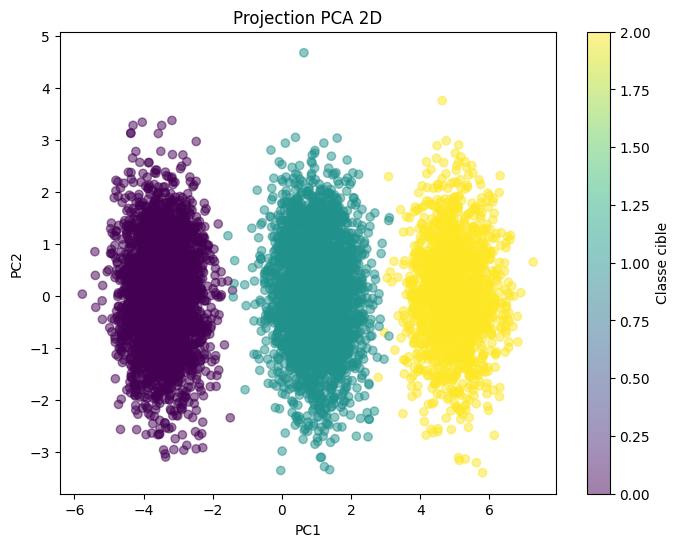

In [ ]:
# Affichage en 2D
plt.figure(figsize=(8, 6))
plt.scatter(X_train_pca_2d[:, 0], X_train_pca_2d[:, 1], c=y_train, cmap='viridis', alpha=0.5)
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("Projection PCA 2D")
plt.colorbar(label="Classe cible")
plt.show()

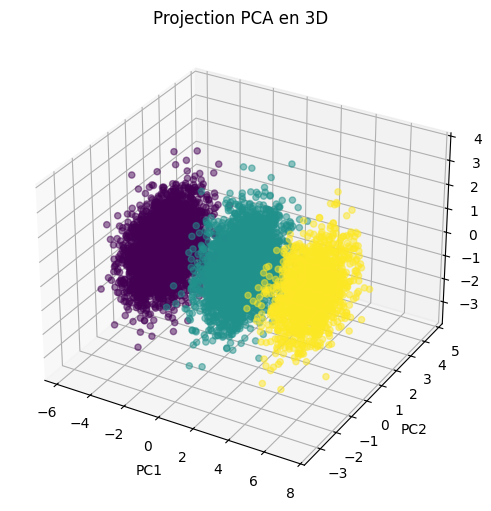

In [ ]:
# Affichage en 3D
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_train_pca_3d[:, 0], X_train_pca_3d[:, 1], X_train_pca_3d[:, 2], c=y_train, cmap='viridis', alpha=0.5)
ax.set_xlabel("PC1")
ax.set_ylabel("PC2")
ax.set_zlabel("PC3")
ax.set_title("Projection PCA en 3D")
plt.show()

# **Classification Supervisée**

**Régression Logistique**

Entraînement sur les données normalisées

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Entraînement du modèle sur les données normalisées
log_reg_original = LogisticRegression(max_iter=200)
log_reg_original.fit(X_train_scaled, y_train)

# Prédictions
y_pred_log_original = log_reg_original.predict(X_test_scaled)

# Évaluation du modèle
accuracy_log_original = accuracy_score(y_test, y_pred_log_original)
print(f"\nAccuracy de la Régression Logistique (Données normalisées) : {accuracy_log_original:.2f}")

# Matrice de confusion et rapport de classification
print("\nMatrice de Confusion :")
print(confusion_matrix(y_test, y_pred_log_original))

print("\nRapport de Classification :")
print(classification_report(y_test, y_pred_log_original))


Accuracy de la Régression Logistique (Données normalisées) : 1.00

Matrice de Confusion :
[[800   0   0]
 [  0 800   0]
 [  0   0 400]]

Rapport de Classification :
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       800
           1       1.00      1.00      1.00       800
           2       1.00      1.00      1.00       400

    accuracy                           1.00      2000
   macro avg       1.00      1.00      1.00      2000
weighted avg       1.00      1.00      1.00      2000



Entraînement sur les données réduites par PCA (2D)

In [ ]:
# Entraînement du modèle sur PCA 2D
log_reg_pca_2d = LogisticRegression(max_iter=200)
log_reg_pca_2d.fit(X_train_pca_2d, y_train)

# Prédictions
y_pred_log_pca_2d = log_reg_pca_2d.predict(X_test_pca_2d)

# Évaluation du modèle
accuracy_log_pca_2d = accuracy_score(y_test, y_pred_log_pca_2d)
print(f"\nAccuracy de la Régression Logistique (PCA 2D) : {accuracy_log_pca_2d:.2f}")

# Matrice de confusion et rapport de classification
print("\nMatrice de Confusion :")
print(confusion_matrix(y_test, y_pred_log_pca_2d))

print("\nRapport de Classification :")
print(classification_report(y_test, y_pred_log_pca_2d))


Accuracy de la Régression Logistique (PCA 2D) : 1.00

Matrice de Confusion :
[[799   1   0]
 [  0 800   0]
 [  0   2 398]]

Rapport de Classification :
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       800
           1       1.00      1.00      1.00       800
           2       1.00      0.99      1.00       400

    accuracy                           1.00      2000
   macro avg       1.00      1.00      1.00      2000
weighted avg       1.00      1.00      1.00      2000



Entraînement sur les données réduites par PCA (3D)

In [ ]:
# Entraînement du modèle sur PCA 3D
log_reg_pca_3d = LogisticRegression(max_iter=200)
log_reg_pca_3d.fit(X_train_pca_3d, y_train)

# Prédictions
y_pred_log_pca_3d = log_reg_pca_3d.predict(X_test_pca_3d)

# Évaluation du modèle
accuracy_log_pca_3d = accuracy_score(y_test, y_pred_log_pca_3d)
print(f"\nAccuracy de la Régression Logistique (PCA 3D) : {accuracy_log_pca_3d:.2f}")

# Matrice de confusion et rapport de classification
print("\nMatrice de Confusion :")
print(confusion_matrix(y_test, y_pred_log_pca_3d))

print("\nRapport de Classification :")
print(classification_report(y_test, y_pred_log_pca_3d))


Accuracy de la Régression Logistique (PCA 3D) : 1.00

Matrice de Confusion :
[[799   1   0]
 [  0 800   0]
 [  0   2 398]]

Rapport de Classification :
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       800
           1       1.00      1.00      1.00       800
           2       1.00      0.99      1.00       400

    accuracy                           1.00      2000
   macro avg       1.00      1.00      1.00      2000
weighted avg       1.00      1.00      1.00      2000



Visualisation en 2D (PCA)

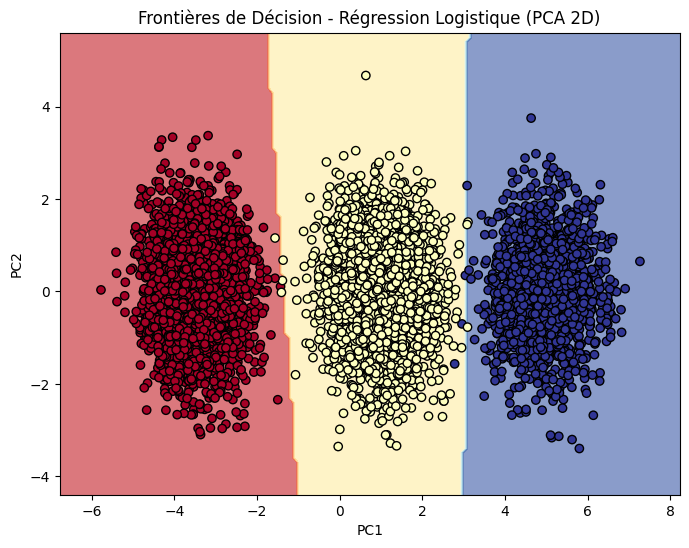

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Création d'une grille pour la visualisation
x_min, x_max = X_train_pca_2d[:, 0].min() - 1, X_train_pca_2d[:, 0].max() + 1
y_min, y_max = X_train_pca_2d[:, 1].min() - 1, X_train_pca_2d[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1), np.arange(y_min, y_max, 0.1))

# Prédictions sur la grille
Z = log_reg_pca_2d.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Affichage des frontières de décision
plt.figure(figsize=(8,6))
plt.contourf(xx, yy, Z, alpha=0.6, cmap=plt.cm.RdYlBu)
plt.scatter(X_train_pca_2d[:, 0], X_train_pca_2d[:, 1], c=y_train, edgecolors='k', marker='o', cmap=plt.cm.RdYlBu)
plt.title('Frontières de Décision - Régression Logistique (PCA 2D)')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

Visualisation en 3D (PCA)

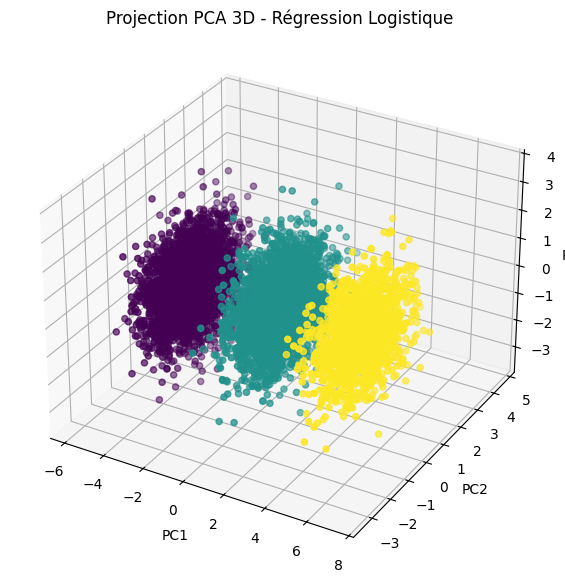

In [ ]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(10,7))
ax = fig.add_subplot(111, projection='3d')

# Affichage des points colorés par classe
ax.scatter(X_train_pca_3d[:, 0], X_train_pca_3d[:, 1], X_train_pca_3d[:, 2], c=y_train, marker='o', cmap='viridis')

plt.title('Projection PCA 3D - Régression Logistique')
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')
plt.show()

Courbe ROC

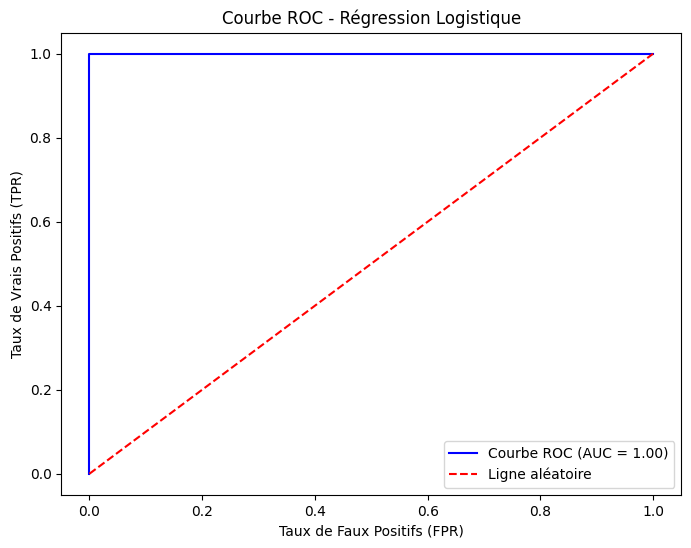

Seuil optimal pour la Régression Logistique : 0.52


In [ ]:
# Courbe ROC et Seuil Optimal pour la RÉGRESSION LOGISTIQUE

from sklearn.metrics import roc_curve, auc

# Prédiction des probabilités
y_proba = log_reg.predict_proba(X_test_scaled)[:, 1]  # Probabilité d'appartenance à la classe 1

# Calcul des courbes ROC
fpr, tpr, thresholds = roc_curve(y_test, y_proba, pos_label=1)

# Calcul de l'AUC (Area Under Curve)
roc_auc = auc(fpr, tpr)

# Affichage de la courbe ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'Courbe ROC (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], linestyle='--', color='red', label="Ligne aléatoire")
plt.xlabel("Taux de Faux Positifs (FPR)")
plt.ylabel("Taux de Vrais Positifs (TPR)")
plt.title("Courbe ROC - Régression Logistique")
plt.legend()
plt.show()

# Détermination du seuil optimal
optimal_idx = np.argmax(tpr - fpr)
optimal_threshold = thresholds[optimal_idx]
print(f"Seuil optimal pour la Régression Logistique : {optimal_threshold:.2f}")

**KNN**

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier

# Définition de la grille d'hyperparamètres pour trouver le meilleur K
param_grid_knn = {'n_neighbors': range(1, 21)}

# Exécution de Grid Search
grid_search_knn = GridSearchCV(KNeighborsClassifier(), param_grid_knn, cv=10, scoring='accuracy', n_jobs=-1)
grid_search_knn.fit(X_train_scaled, y_train)

# Récupération du meilleur K trouvé
best_k = grid_search_knn.best_params_['n_neighbors']
print(f"Meilleur K trouvé pour KNN : {best_k}")

# Entraînement du modèle KNN avec le meilleur K
knn_best = KNeighborsClassifier(n_neighbors=best_k)
knn_best.fit(X_train_scaled, y_train)

# Évaluation du modèle
accuracy_knn_best = knn_best.score(X_test_scaled, y_test)
print(f"Accuracy du KNN optimisé : {accuracy_knn_best:.2f}")


Meilleur K trouvé pour KNN : 19
Accuracy du KNN optimisé : 1.00


Données en 2D

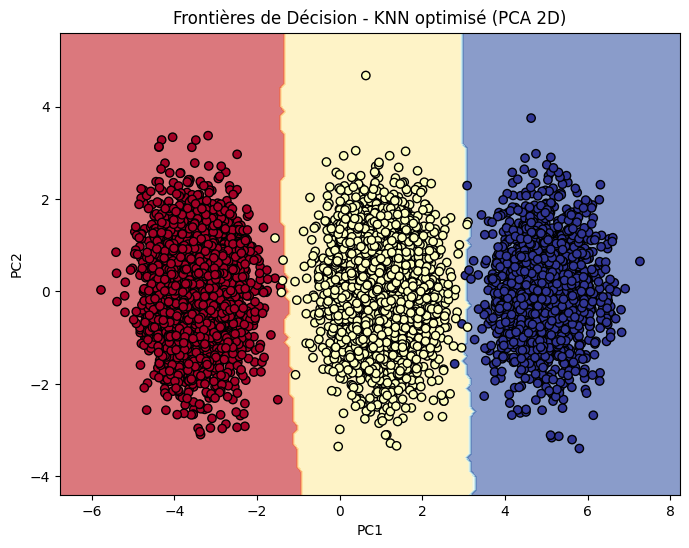

In [ ]:
# Création d'une grille pour la visualisation
x_min, x_max = X_train_pca_2d[:, 0].min() - 1, X_train_pca_2d[:, 0].max() + 1
y_min, y_max = X_train_pca_2d[:, 1].min() - 1, X_train_pca_2d[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1), np.arange(y_min, y_max, 0.1))

# Prédictions sur la grille avec KNN entraîné sur PCA 2D
Z = knn_pca_2d.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Affichage des frontières de décision
plt.figure(figsize=(8,6))
plt.contourf(xx, yy, Z, alpha=0.6, cmap=plt.cm.RdYlBu)
plt.scatter(X_train_pca_2d[:, 0], X_train_pca_2d[:, 1], c=y_train, edgecolors='k', marker='o', cmap=plt.cm.RdYlBu)
plt.title('Frontières de Décision - KNN optimisé (PCA 2D)')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

Données en 3D

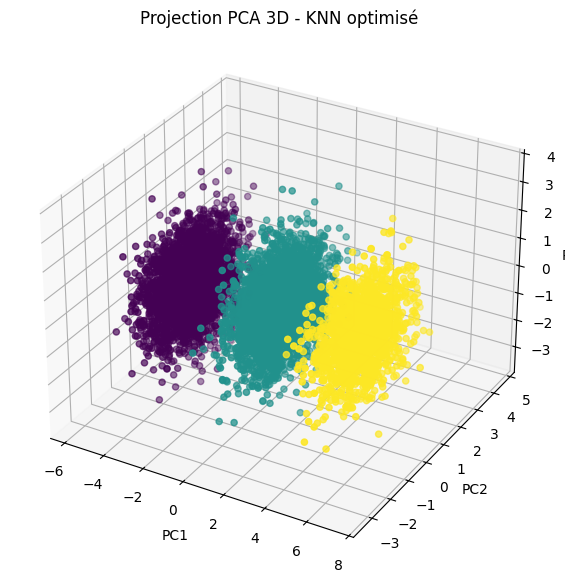

In [ ]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(10,7))
ax = fig.add_subplot(111, projection='3d')

# Affichage des points colorés par classe
ax.scatter(X_train_pca_3d[:, 0], X_train_pca_3d[:, 1], X_train_pca_3d[:, 2], c=y_train, marker='o', cmap='viridis')

plt.title('Projection PCA 3D - KNN optimisé')
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')
plt.show()

**Arbre de Décision**

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

# Définition de la grille d'hyperparamètres pour l'arbre de décision
param_grid_tree = {
    'max_depth': range(3, 20),
    'min_samples_leaf': range(1, 10)
}

# Recherche du meilleur modèle avec validation croisée
grid_search_tree = GridSearchCV(DecisionTreeClassifier(), param_grid_tree, cv=5, scoring='accuracy', n_jobs=-1)
grid_search_tree.fit(X_train_scaled, y_train)

# Meilleurs hyperparamètres trouvés
best_params_tree = grid_search_tree.best_params_
print(f"Meilleurs paramètres pour l'Arbre de Décision : {best_params_tree}")

# Entraînement du modèle avec les meilleurs hyperparamètres
tree_best = DecisionTreeClassifier(**best_params_tree)
tree_best.fit(X_train_scaled, y_train)

# Évaluation du modèle optimisé
accuracy_tree_best = tree_best.score(X_test_scaled, y_test)
print(f"Accuracy de l'Arbre de Décision optimisé : {accuracy_tree_best:.2f}")


Meilleurs paramètres pour l'Arbre de Décision : {'max_depth': 16, 'min_samples_leaf': 1}
Accuracy de l'Arbre de Décision optimisé : 0.98


2D


Accuracy Arbre de Décision: 0.983


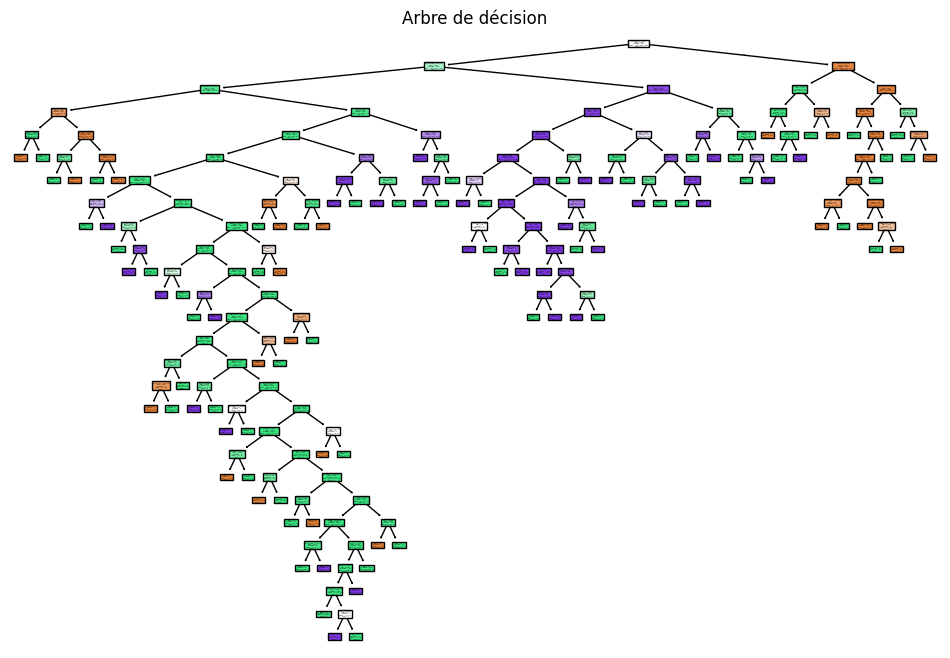

In [ ]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
#Arbre de décision
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)
print("\nAccuracy Arbre de Décision:", accuracy_score(y_test, y_pred_dt))

#Affichage du schéma de l'arbre
title = "Arbre de décision"
plt.figure(figsize=(12,8))


class_names = [str(c) for c in np.unique(y)]
plot_tree(dt, feature_names=df.columns[:-1], class_names=class_names, filled=True)
plt.title(title)
plt.show()

3D

In [ ]:
# Entraînement d'un Arbre de Décision sur les données PCA 3D
tree_pca_3d = DecisionTreeClassifier(**best_params_tree)
tree_pca_3d.fit(X_train_pca_3d, y_train)

DecisionTreeClassifier(max_depth=16)

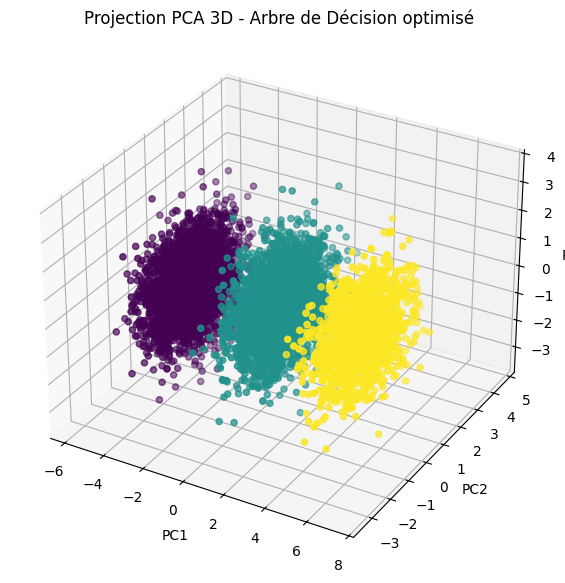

In [ ]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(10,7))
ax = fig.add_subplot(111, projection='3d')

# Affichage des points colorés par classe
ax.scatter(X_train_pca_3d[:, 0], X_train_pca_3d[:, 1], X_train_pca_3d[:, 2], c=y_train, marker='o', cmap='viridis')

plt.title('Projection PCA 3D - Arbre de Décision optimisé')
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')
plt.show()

# **Clustering Non Supervisé avec KMeans**

Détermination du meilleur K

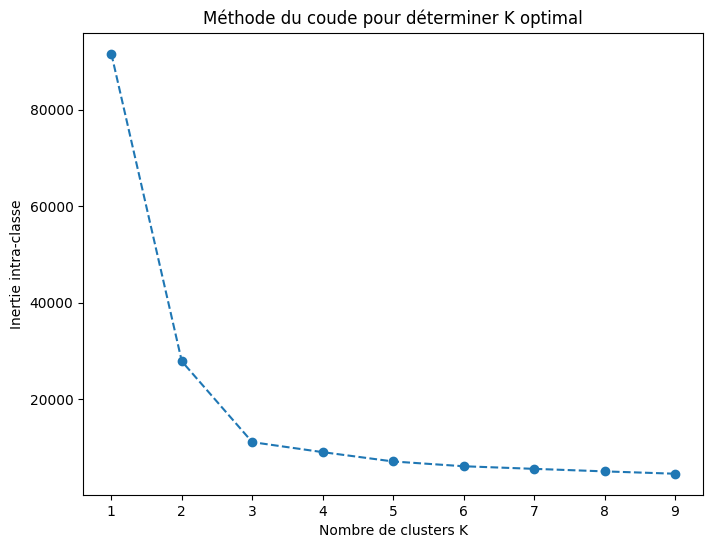

In [ ]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Tester différentes valeurs de K
inertias = []
K_range = range(1, 10)

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_train_pca_2d)
    inertias.append(kmeans.inertia_)

# Affichage de la méthode du coude
plt.figure(figsize=(8, 6))
plt.plot(K_range, inertias, marker='o', linestyle='--')
plt.xlabel("Nombre de clusters K")
plt.ylabel("Inertie intra-classe")
plt.title("Méthode du coude pour déterminer K optimal")
plt.show()

Entraînement

In [ ]:
# Définition du meilleur nombre de clusters basé sur la méthode du coude
best_k = 3

# Entraînement du modèle K-Means avec K optimal
kmeans_best = KMeans(n_clusters=best_k, random_state=42, n_init=10)
kmeans_best.fit(X_train_pca_2d)

# Vérification des clusters trouvés
print(f"Centres des clusters :\n{kmeans_best.cluster_centers_}")


Centres des clusters :
[[-3.45435544 -0.01317918]
 [ 0.98188123  0.00851951]
 [ 4.95355672  0.00937304]]


2D

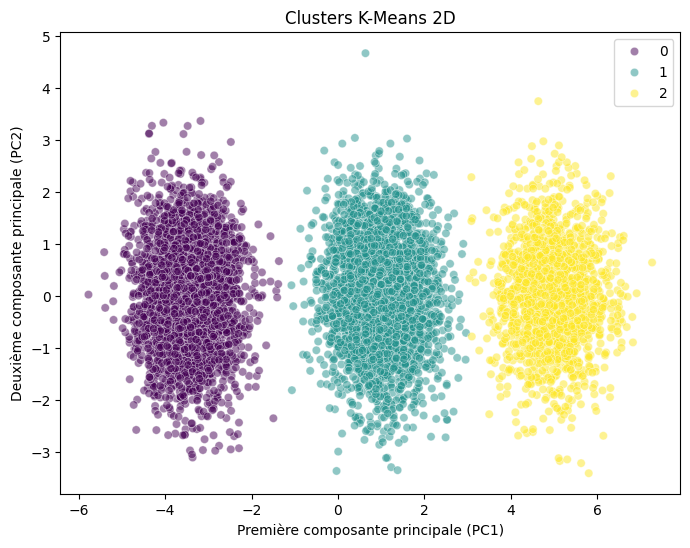

In [ ]:
import seaborn as sns

# Affichage des clusters
plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_train_pca_2d[:, 0], y=X_train_pca_2d[:, 1], hue=kmeans_best.labels_, palette='viridis', alpha=0.5)
plt.xlabel("Première composante principale (PC1)")
plt.ylabel("Deuxième composante principale (PC2)")
plt.title("Clusters K-Means 2D")
plt.show()

3D

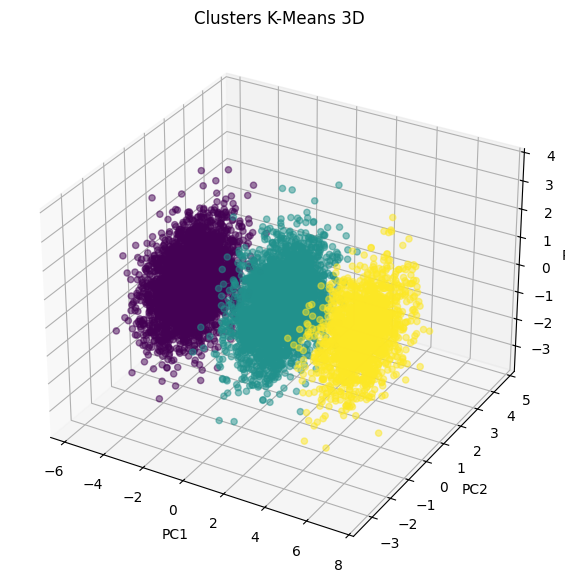

In [ ]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

# Affichage des clusters en 3D
ax.scatter(X_train_pca_3d[:, 0], X_train_pca_3d[:, 1], X_train_pca_3d[:, 2], c=kmeans_best.labels_, cmap='viridis', alpha=0.5)

ax.set_xlabel("PC1")
ax.set_ylabel("PC2")
ax.set_zlabel("PC3")
ax.set_title("Clusters K-Means 3D")
plt.show()

# **Optimisation des Hyperparamètres avec Grid Search**

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
import numpy as np

# Validation croisée pour KNN
cv_scores_knn = cross_val_score(KNeighborsClassifier(n_neighbors=best_k), X_train_scaled, y_train, cv=10)
print(f"Score moyen en validation croisée (KNN) : {np.mean(cv_scores_knn):.2f}")

# Validation croisée pour la Régression Logistique (avec PCA 2D)
cv_scores_log = cross_val_score(LogisticRegression(), X_train_pca_2d, y_train, cv=10)
print(f"Score moyen en validation croisée (Régression Logistique) : {np.mean(cv_scores_log):.2f}")

# Validation croisée pour l'Arbre de Décision (avec PCA 2D)
cv_scores_tree = cross_val_score(DecisionTreeClassifier(**best_params_tree), X_train_pca_2d, y_train, cv=10)
print(f"Score moyen en validation croisée (Arbre de Décision) : {np.mean(cv_scores_tree):.2f}")

Score moyen en validation croisée (KNN) : 1.00
Score moyen en validation croisée (Régression Logistique) : 1.00
Score moyen en validation croisée (Arbre de Décision) : 1.00
